In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [52]:
df = pd.read_csv('world-data-2023.csv')

In [53]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [54]:
df.shape

(195, 35)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [56]:
df.drop('Abbreviation', axis=1, inplace=True)

In [57]:
df.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                                  6
Life expectancy                         

In [58]:
df[df.isnull().any(axis=1)].head(20)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
3,Andorra,164,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
5,Antigua and Barbuda,223,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
8,Australia,3,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072
11,The Bahamas,39,1.40%,"13,880","1,000",13.97,1.0,"Nassau, Bahamas","1,786",116.22,...,27.80%,1.94,"389,482",74.60%,14.80%,33.80%,10.36%,"323,784",25.034280,-77.396280
12,Bahrain,"2,239",11.10%,765,"19,000",13.99,973.0,Manama,"31,694",117.59,...,25.10%,0.93,"1,501,635",73.40%,4.20%,13.80%,0.71%,"1,467,109",26.066700,50.557700
15,Belarus,47,42.00%,"207,600","155,000",9.90,375.0,Minsk,"58,280",NaN,...,34.50%,5.19,"9,466,856",64.10%,14.70%,53.30%,4.59%,"7,482,982",53.709807,27.953389
19,Bhutan,20,13.60%,"38,394","6,000",17.26,975.0,Thimphu,"1,261",167.18,...,19.80%,0.42,"727,145",66.70%,16.00%,35.30%,2.34%,"317,538",27.514162,90.433601
20,Bolivia,11,34.80%,"1,098,581","71,000",21.75,591.0,Sucre,"21,606",148.32,...,25.90%,1.59,"11,513,100",71.80%,17.00%,83.70%,3.50%,"8,033,035",-16.290154,-63.588653
21,Bosnia and Herzegovina,64,43.10%,"51,197","11,000",8.11,387.0,Sarajevo,"21,848",104.9,...,28.60%,2.16,"3,301,000",46.40%,20.40%,23.70%,18.42%,"1,605,144",43.915886,17.679076


In [59]:
transform = [ 'Agricultural Land( %)',  'Armed Forces size','Land Area(Km2)','Density\n(P/Km2)',
'Forested Area (%)', 'Co2-Emissions','CPI', 'CPI Change (%)', 'Gasoline Price', 'GDP',
'Gross primary education enrollment (%)','Gross tertiary education enrollment (%)',
'Minimum wage', 'Out of pocket health expenditure', 'Urban_population','Population: Labor force participation (%)',
'Population' ,'Tax revenue (%)', 'Unemployment rate','Total tax rate']
df[transform] = df[transform].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))


C:\Users\hp\AppData\Local\Temp\ipykernel_18880\106012158.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[transform] = df[transform].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))


In [60]:
df['Urban_percent'] = df['Urban_population'] / df['Population'] * 100

In [61]:
df['Agricultural Land(%)'] = pd.to_numeric(df['Agricultural Land( %)'], errors='coerce')

In [62]:
df['Country'] = df['Country'].str.replace("S�����������", "Sao Tome and Principe")


In [63]:
df_sorted_unemployment = df.sort_values(by='Unemployment rate', ascending=False)

top_unemployment_countries = df_sorted_unemployment[['Country', 'Unemployment rate']].head(10)
print("Top 10 countries with highest Unemployment rate")

print(top_unemployment_countries)


print('-----------------------------------------------------------------------------------')


df_sorted_unemployment_asc = df.sort_values(by='Unemployment rate', ascending=True)
top_unemployment_countries_asc = df_sorted_unemployment_asc[['Country', 'Unemployment rate']].head(10)
print("Top 10 countries with lowest Unemployment rate")

print(top_unemployment_countries_asc)

Top 10 countries with highest Unemployment rate
                              Country  Unemployment rate
161                      South Africa              28.18
95                            Lesotho              23.41
146                       Saint Lucia              20.71
119                           Namibia              20.27
61                              Gabon              20.00
147  Saint Vincent and the Grenadines              18.88
97                              Libya              18.56
21             Bosnia and Herzegovina              18.42
22                           Botswana              18.19
66                             Greece              17.24
-----------------------------------------------------------------------------------
Top 10 countries with lowest Unemployment rate
             Country  Unemployment rate
141            Qatar               0.09
125            Niger               0.47
159  Solomon Islands               0.58
92              Laos              

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Agricultural Land( %)                      188 non-null    float64
 3   Land Area(Km2)                             194 non-null    float64
 4   Armed Forces size                          171 non-null    float64
 5   Birth Rate                                 189 non-null    float64
 6   Calling Code                               194 non-null    float64
 7   Capital/Major City                         192 non-null    object 
 8   Co2-Emissions                              188 non-null    float64
 9   CPI                                        178 non-null    float64
 10  CPI Change (%)            

In [65]:
df_sorted_Fertility_asc = df.sort_values(by='Fertility Rate', ascending=True)
top_Fertility_countries_asc = df_sorted_Fertility_asc[['Country', 'Fertility Rate']].head(10)
print("Top ten countries with lowest Fertility Rate")
print(top_Fertility_countries_asc)

print("-------------------------------------------------------------------")

df_sorted_Fertility_asc = df.sort_values(by='Fertility Rate', ascending=False)
top_Fertility_countries_asc = df_sorted_Fertility_asc[['Country', 'Fertility Rate']].head(10)
print("Top ten countries with Highest Fertility Rate")
print(top_Fertility_countries_asc)

Top ten countries with lowest Fertility Rate
                    Country  Fertility Rate
162             South Korea            0.98
156               Singapore            1.14
106                   Malta            1.23
112                 Moldova            1.26
149              San Marino            1.26
164                   Spain            1.26
21   Bosnia and Herzegovina            1.27
3                   Andorra            1.27
83                    Italy            1.29
183                 Ukraine            1.30
-------------------------------------------------------------------
Top ten countries with Highest Fertility Rate
                              Country  Fertility Rate
125                             Niger            6.91
160                           Somalia            6.07
45   Democratic Republic of the Congo            5.92
105                              Mali            5.88
34                               Chad            5.75
4                              An

In [66]:
df_sorted_per_capita_asc = df.sort_values(by='GDP_per_capita', ascending=True)
top_per_capita_countries_asc = df_sorted_per_capita_asc[['Country', 'GDP_per_capita']].head(10)
print("Top ten countries with lowest GDP_per_capita")
print(top_per_capita_countries_asc)

print("-------------------------------------------------------------------")

df_sorted_per_capita_asc = df.sort_values(by='GDP_per_capita', ascending=False)
top_per_capita_countries_asc = df_sorted_per_capita_asc[['Country', 'GDP_per_capita']].head(10)
print("Top ten countries with Highest GDP_per_capita")
print(top_per_capita_countries_asc)

KeyError: 'GDP_per_capita'

In [ ]:
df_sorted_Urban = df.sort_values(by='Urban_percent', ascending=False)
top_Urban_pop= df_sorted_Urban[['Country', 'Urban_percent']].head(50)
print(top_Urban_pop)

                  Country  Urban_percent
113                Monaco     100.000000
156             Singapore     100.000000
90                 Kuwait     100.000000
141                 Qatar      99.188014
16                Belgium      98.040997
12                Bahrain      97.700773
149            San Marino      97.368576
187               Uruguay      95.425992
106                 Malta      94.678038
76                Iceland      93.854912
82                 Israel      92.501000
6               Argentina      91.991001
122           Netherlands      91.875998
85                  Japan      91.725869
86                 Jordan      91.203000
61                  Gabon      89.740994
94                Lebanon      88.758004
190             Venezuela      88.240002
46                Denmark      87.994008
3                 Andorra      87.984496
123           New Zealand      87.974799
168                Sweden      87.707999
35                  Chile      87.643002
100            L

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

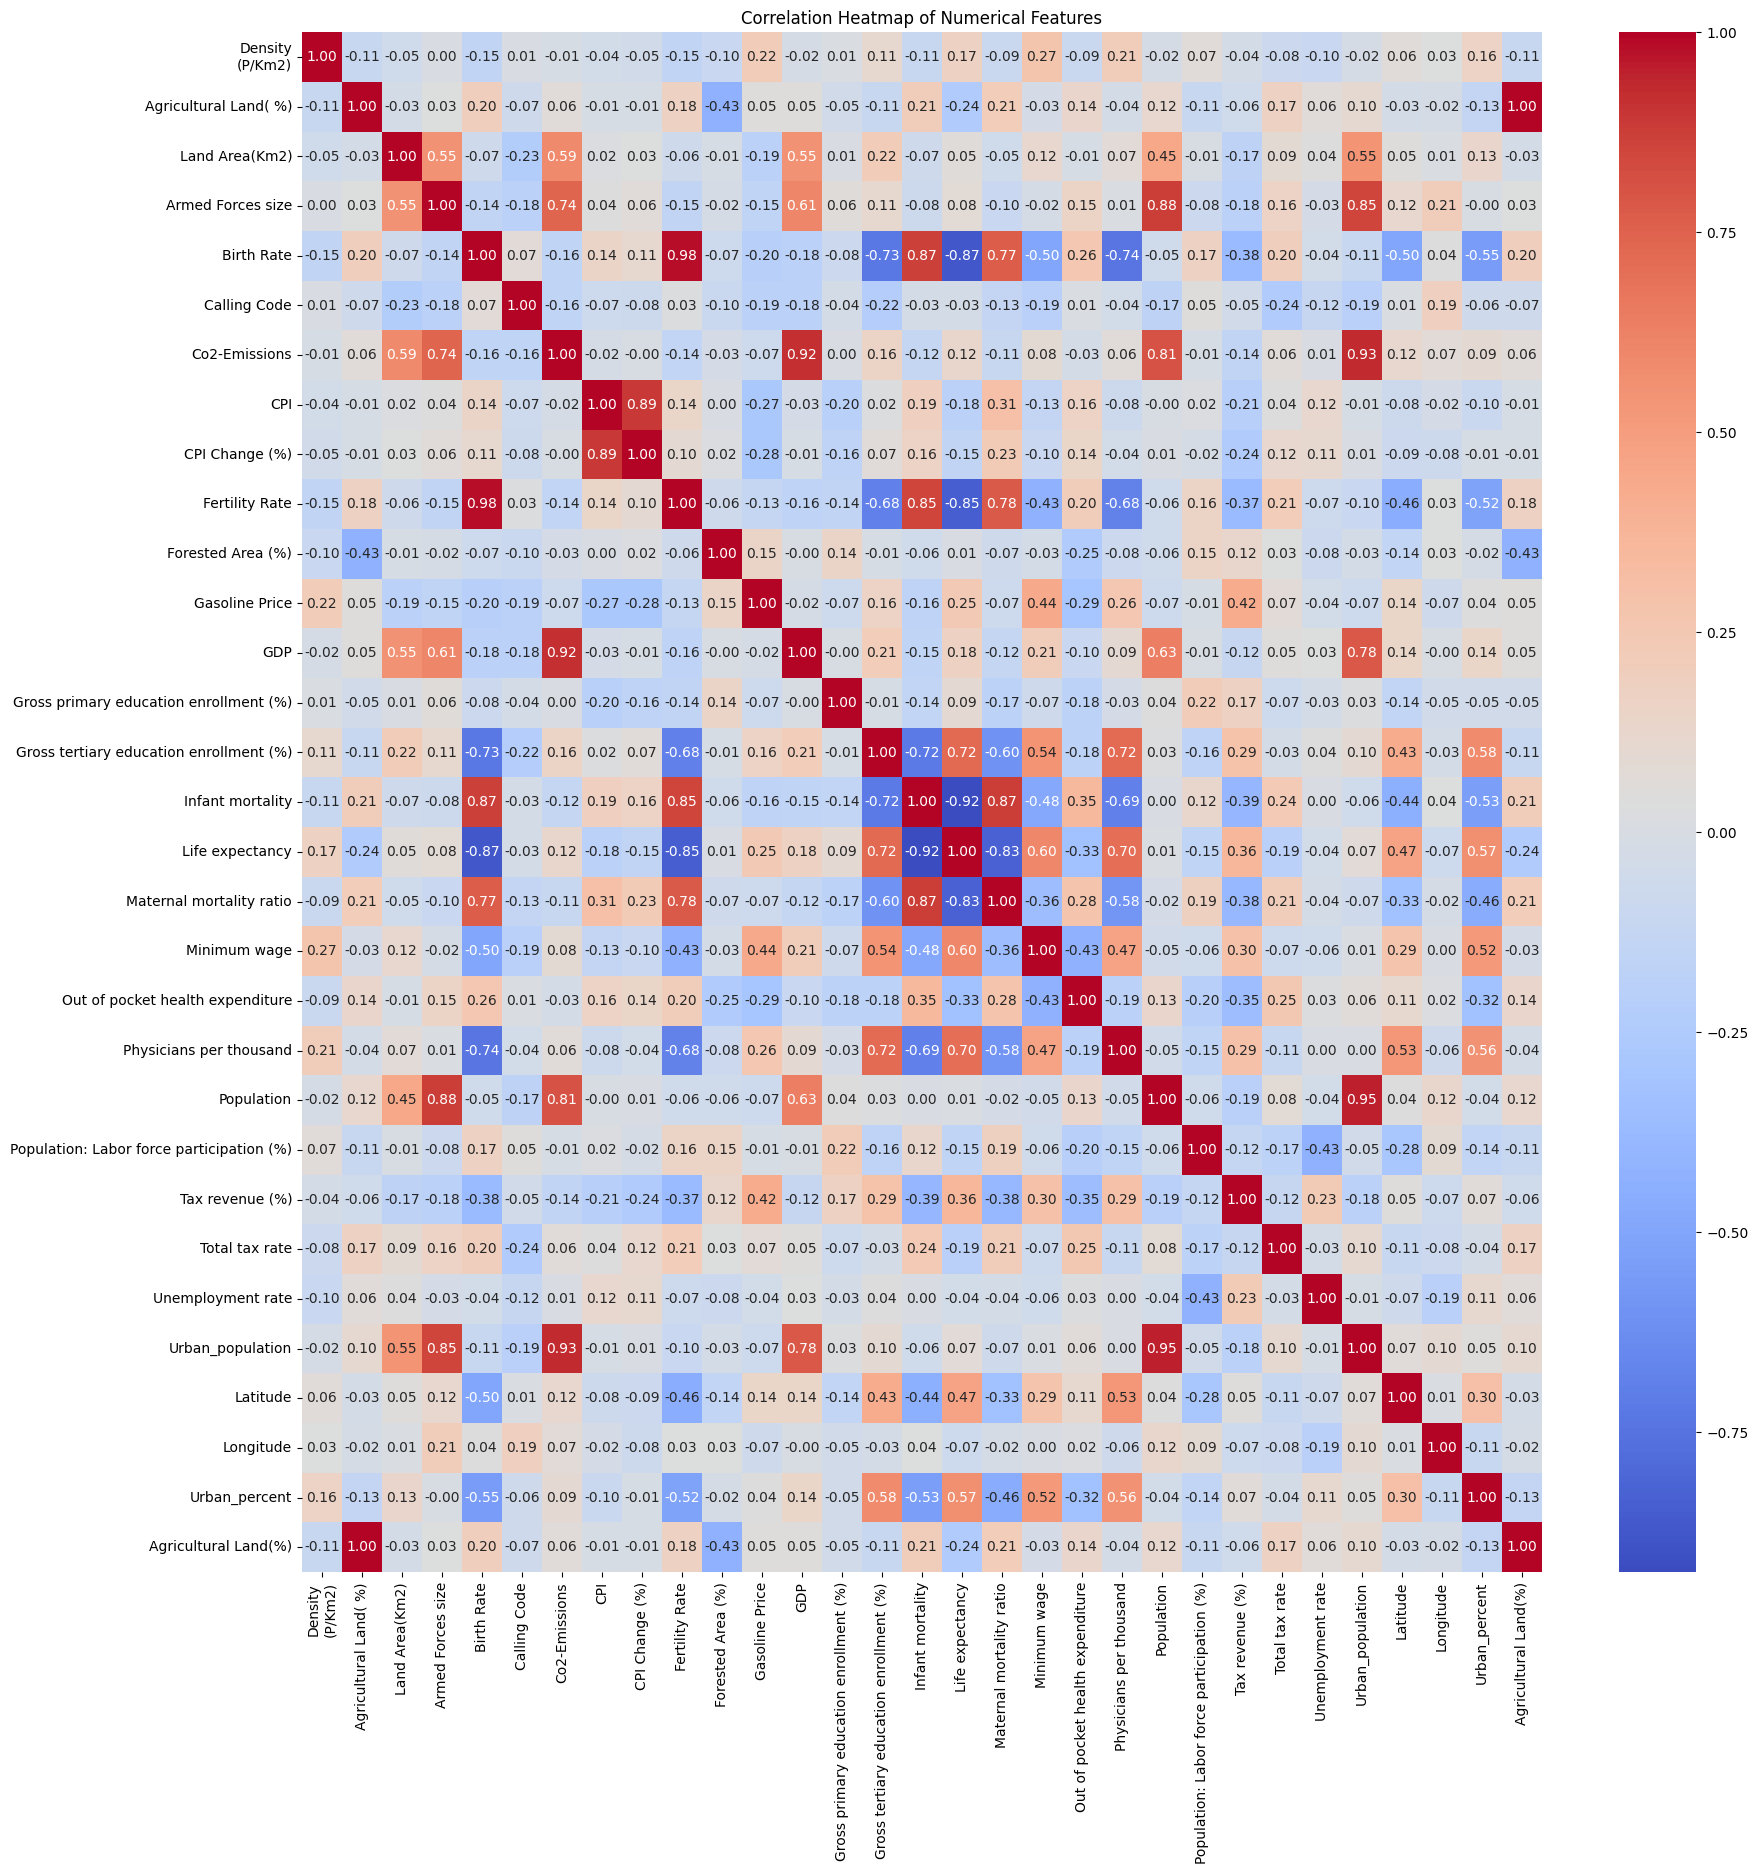

In [ ]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(20, 20))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
non_positive_mask = df['Tax revenue (%)'] <= 0

if non_positive_mask.any():
    df = df[~non_positive_mask]
fig = px.scatter(df, x="Tax revenue (%)", y="Total tax rate",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Dependency of tax revenue on tax rate",hover_name="Country")
fig.show()


### Dependency of tax revenue on tax rate

With this graph we can come to a conclusion that tax revenue is not dependent on tax rate


In [ ]:
non_positive_mask = df['Tax revenue (%)'] <= 0

if non_positive_mask.any():
    df = df[~non_positive_mask]
fig = px.scatter(df, x="Tax revenue (%)", y="Population",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Dependency of tax revenue on population",hover_name="Country")
fig.show()


### Dependency of tax revenue on population

With this graph we can come to a conclusion that lower the population the percentage of revenue from tax increases.

In [ ]:


fig = px.scatter(df, x="Infant mortality", y="Maternal mortality ratio",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Maternal mortality rate dependency on infant mortality rate",hover_name="Country")
fig.show()


### Maternal mortality rate dependency on infant mortality rate

This graphs shows that the death of both mother and child are codependent.

In [ ]:
df['GDP_per_capita'] = (df['GDP'] / df['Population'])/1000

In [ ]:

fig = px.scatter(df, x="GDP_per_capita", y="Infant mortality",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Do high income means less infant mortality?",hover_name="Country")
fig.show()


### Do high income means less infant mortality

As we can see from the graph that as the society earns more people tend to have better health infrastructure and thus have better treatment and care for mother and infant thus having less death.

In [ ]:

fig = px.scatter(df, x="GDP_per_capita", y="Life expectancy",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="can we buy life with money?",hover_name="Country")
fig.show()


### Can we buy life with money

Its same as infant mortality vs GDP per capita people with money have better life style, eating habits, health infrastructure and better condition to live in.

In [ ]:

fig = px.scatter(df, x="Physicians per thousand", y="Life expectancy",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Physicians per thousand vs Life Expectancy",hover_name="Country")
fig.show()

### Physicians per thousand vs Life Expectancy

Physicians per thousand show the image of a countries health infrastructure and life expectancy increases with more physicians per thousand.

In [ ]:

fig = px.scatter(df, x="GDP_per_capita", y="Physicians per thousand",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Does more money means more life saviours? ", hover_name="Country")
fig.show()

### Does more money means more life saviour

Both GDP per capita and Physicians per thousand shows the development of a country and both are co dependent on each other so as gdp per capita increases no. of physicians also increases

In [ ]:

fig = px.scatter(df, x="Gross primary education enrollment (%)", y="Infant mortality",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Is infants life is dependent on there parents primary education?",hover_name="Country")
fig.show()

In [ ]:
fig = px.scatter(df, x="Gross tertiary education enrollment (%)", y="Infant mortality",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Is infants life is dependent on there parents tertiary education?",hover_name="Country")
fig.show()

### Dependency of infant mortality on parents education

As the society get educated primarily advanced education they tend to get more aware about practices to take care of mother during pregnanncy and what to do to take care of child after birth like all the vaccines required and dietry habits.

In [ ]:
non_positive_mask = df['Gasoline Price'] <= 0

if non_positive_mask.any():
    df = df[~non_positive_mask]
fig = px.scatter(df, x="Gasoline Price", y="Minimum wage",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Gasoline price vs minimum wage",hover_name="Country")
fig.show()

In [ ]:
fig = px.scatter(df, x="GDP_per_capita", y="Minimum wage",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="GDP per capita vs minimum wage", hover_name="Country")
fig.show()

In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    192 non-null    object 
 1   Density
(P/Km2)                            192 non-null    float64
 2   Agricultural Land( %)                      185 non-null    float64
 3   Land Area(Km2)                             191 non-null    float64
 4   Armed Forces size                          168 non-null    float64
 5   Birth Rate                                 186 non-null    float64
 6   Calling Code                               191 non-null    float64
 7   Capital/Major City                         189 non-null    object 
 8   Co2-Emissions                              185 non-null    float64
 9   CPI                                        176 non-null    float64
 10  CPI Change (%)                 

### GDP per capita vs minimum wage

Its obvious that GDP per capita increases with the increase in minimum wage.

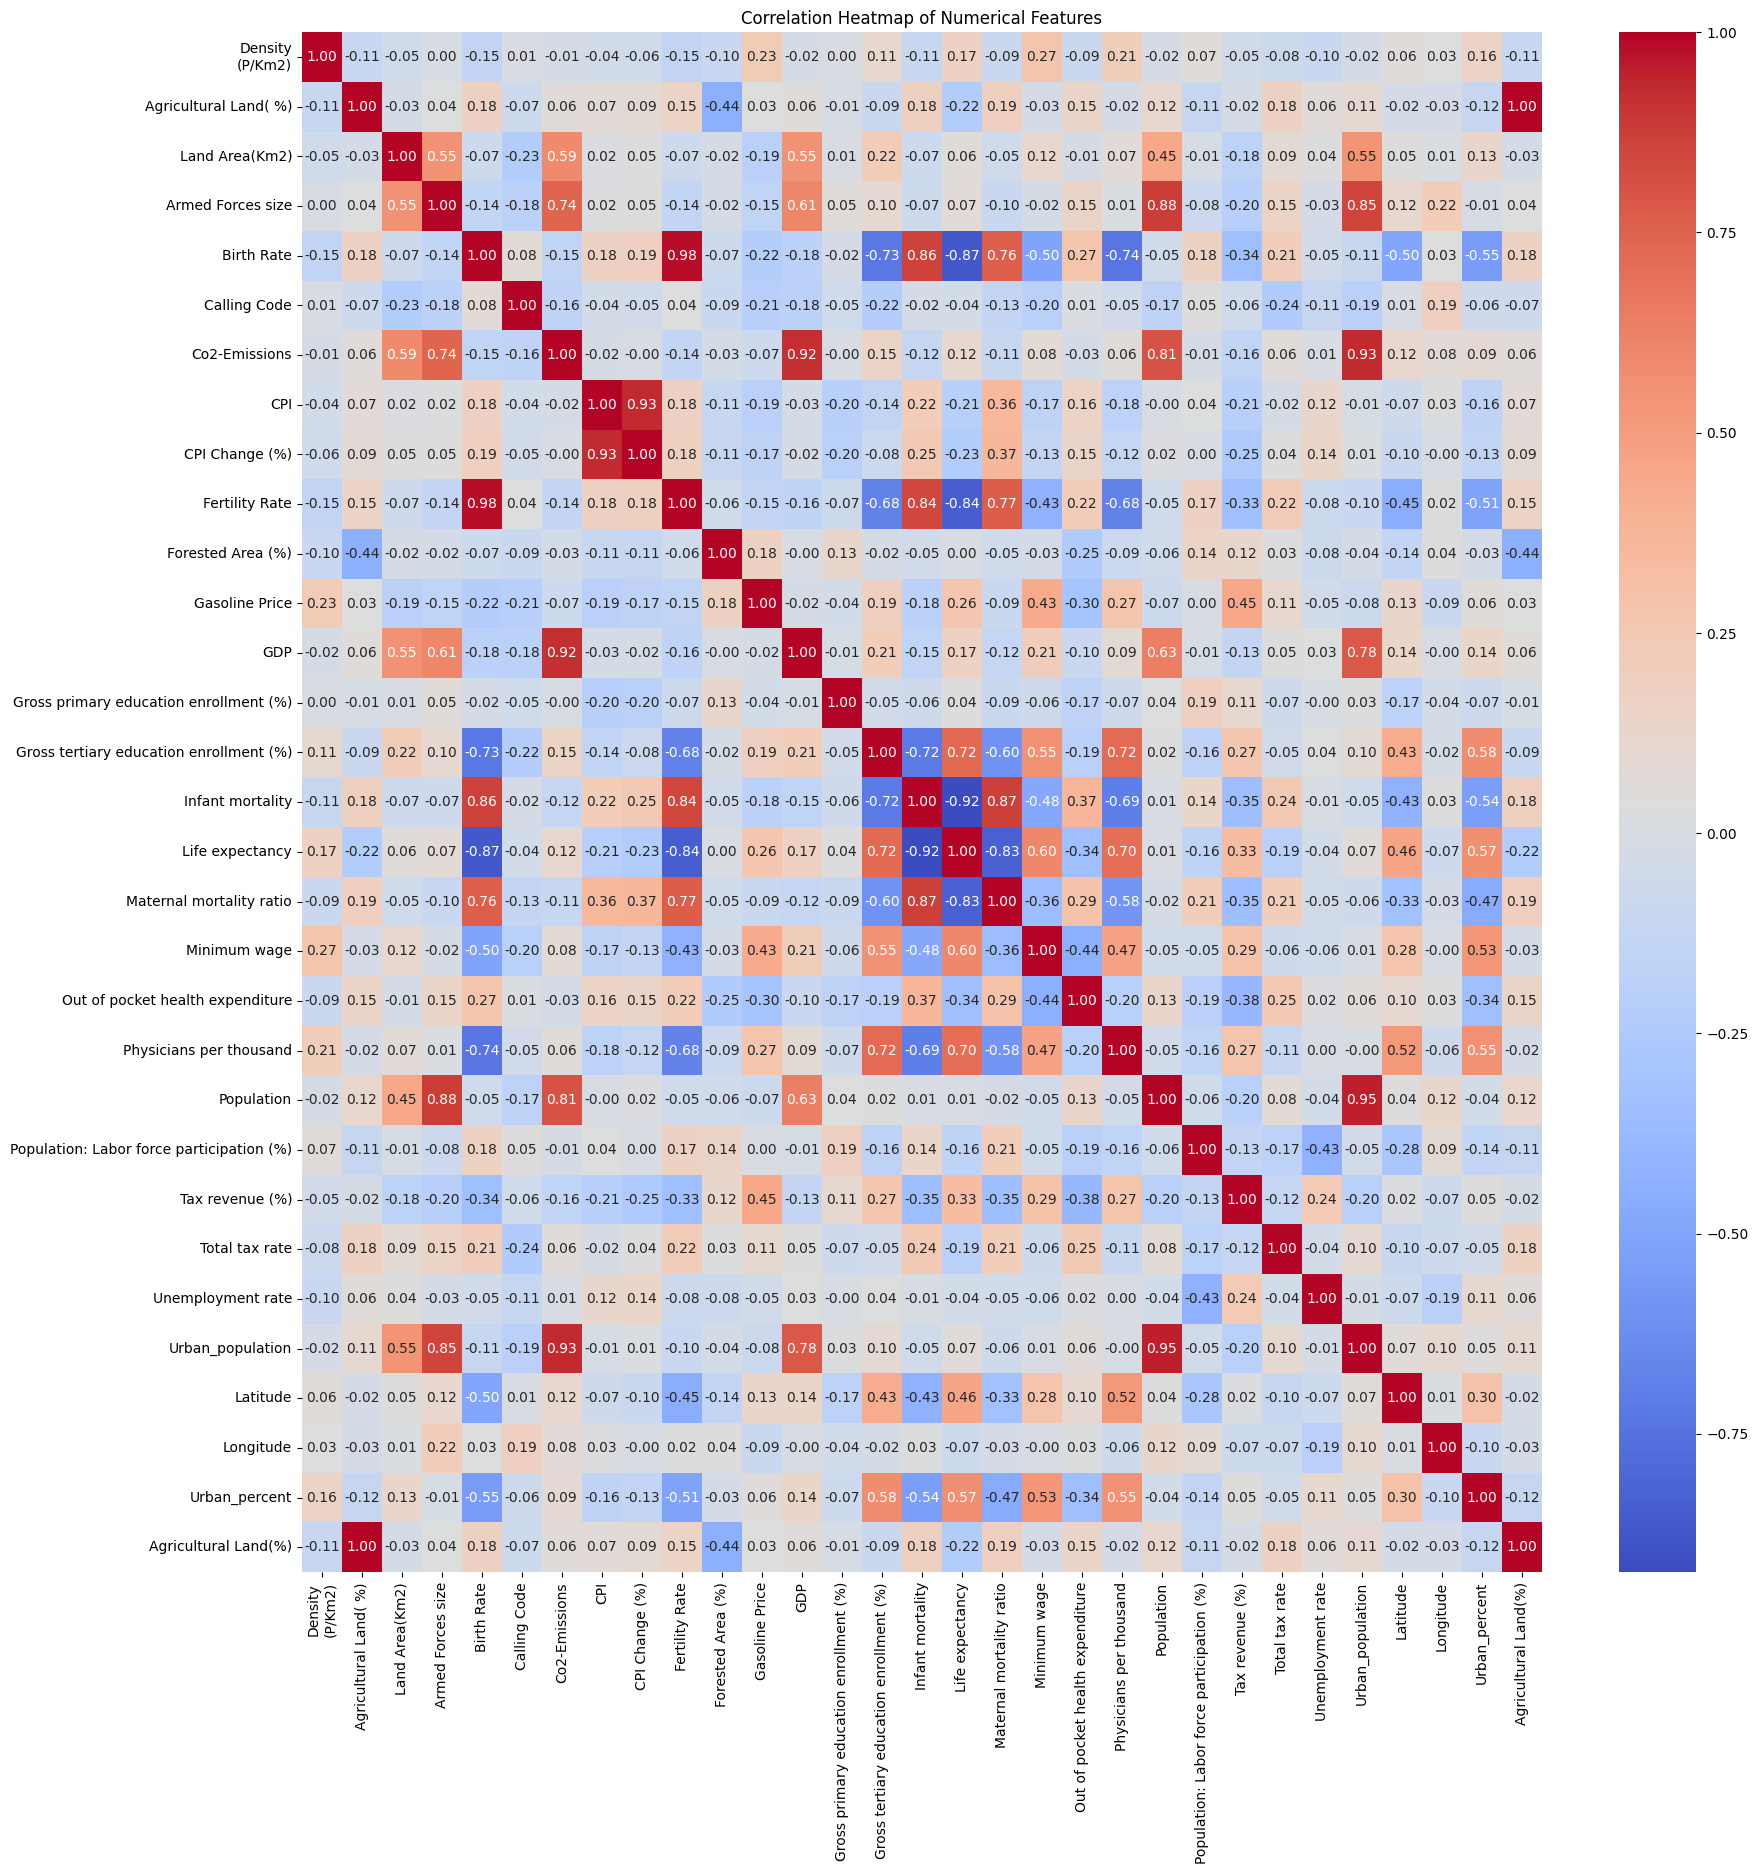

In [ ]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(20, 20))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
fig = px.scatter(df, x="GDP", y="Armed Forces size",
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="GDP per capita vs minimum wage", hover_name="Country")
fig.show()

In [ ]:
!jupyter nbconvert World_Trends.ipynb --to pdf 

[NbConvertApp] Converting notebook World_Trends.ipynb to pdf
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\share\jupyter\nbconvert\templates\latex\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] ERROR | Error while converting 'World_Trends.ipynb'
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nbconvert\nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nbconvert\exporters\templateexporter.py", line 386, in from_fi